In [20]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

# from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

version_fn = getattr(tf.keras, "version", None)
print(version_fn())
if version_fn and version_fn().startswith("3."):
    import tf_keras as keras
else:
    keras = tf.keras

3.4.1
Here


In [33]:
IMAGE_SHAPE = (224, 224)


classifier = keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

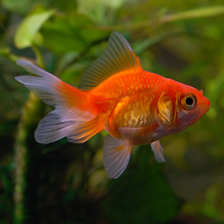

In [23]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [26]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [34]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [36]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 25ms/step


(1, 1001)

In [39]:
result

array([[ 0.22107819,  2.0497658 ,  9.622808  , ..., -1.46193   ,
        -0.28230846, -0.25916237]], dtype=float32)

In [38]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [40]:
image_labels = []
with open('ImageNetLabels.txt', "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [43]:
image_labels[predicted_label_index]

'goldfish'

## Load flowers dataset

In [44]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


In [45]:
data_dir

'./datasets/flower_photos'

In [46]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [47]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [48]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [49]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

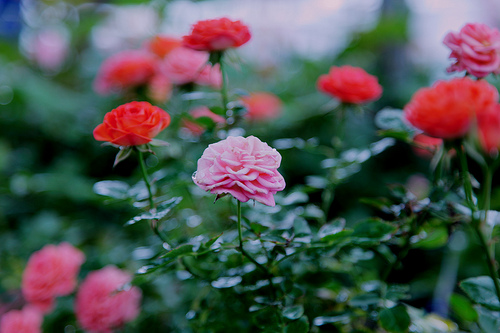

In [50]:
Image.open(str(roses[1]))

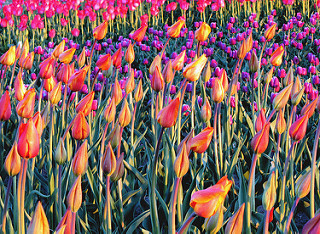

In [51]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

## Read flowers images from disk into numpy array using opencv

In [52]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [53]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [54]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [56]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(243, 500, 3)

In [58]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [59]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [60]:
X = np.array(X)
y = np.array(y)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [62]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [65]:
X[0].shape

(224, 224, 3)

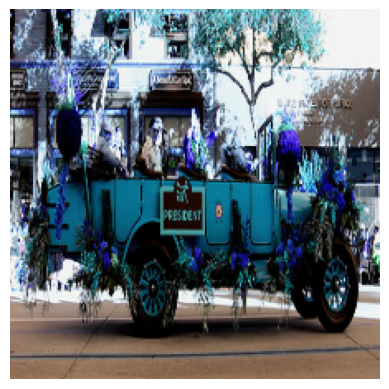

In [68]:
plt.axis('off')
plt.imshow(X[0])

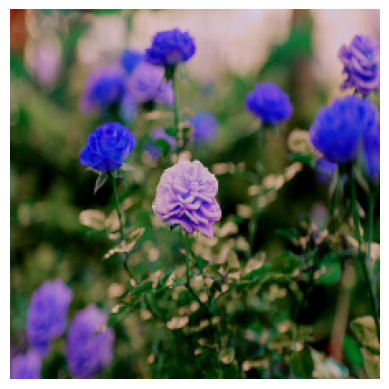

In [69]:
plt.axis('off')
plt.imshow(X[1])

In [70]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [71]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

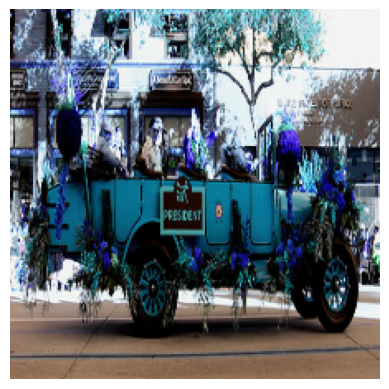

In [72]:
plt.axis('off')
plt.imshow(X[0])

In [73]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 298ms/step


array([795, 795, 722])

In [75]:
image_labels[722]

'pillow'

## Now take pre-trained model and retrain it using flowers images

In [77]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [79]:
num_of_flowers = 5

model = keras.Sequential([
  pretrained_model_without_top_layer,
  keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_13 (KerasLayer  (None, 1280)              2257984   
 )                                                               
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [80]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 18s 144ms/step - loss: 0.7906 - acc: 0.7100
Epoch 2/5
86/86 [==============================] - 12s 137ms/step - loss: 0.4102 - acc: 0.8608
Epoch 3/5
86/86 [==============================] - 12s 141ms/step - loss: 0.3195 - acc: 0.8964
Epoch 4/5
86/86 [==============================] - 12s 145ms/step - loss: 0.2656 - acc: 0.9186
Epoch 5/5
86/86 [==============================] - 13s 150ms/step - loss: 0.2282 - acc: 0.9306


In [81]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 141ms/step - loss: 0.3902 - acc: 0.8682


[0.39022397994995117, 0.8681917190551758]